To query data in InfluxDB : [command line interface](https://docs.influxdata.com/influxdb/v1.7/tools/shell/) or [client libraries](https://docs.influxdata.com/influxdb/v1.7/tools/api_client_libraries/).

This notebook is a tutorial for `influxdb-python`, one of the client libraries to query InfluxDB.
- GitHub https://github.com/influxdata/influxdb-python

- Tutorials https://influxdb-python.readthedocs.io/en/latest/examples.html

- Documentation https://influxdb-python.readthedocs.io/en/latest/

- API Documentation https://influxdb-python.readthedocs.io/en/latest/api-documentation.html#api-documentation


```python
#Dependencies
#HTTP library for human beings
! pip install requests
#writing from and reading to DataFrames
! pip install pandas
#to create and manage the documentation
! pip install Sphinx 
#to auto-discover tests
! pip install nose
#to mock tests
! pip install mock

#to install, upgrade or uninstall influxdb-pytho
! pip install influxdb
#! pip install --upgrade influxdb
#! pip uninstall influxdb
```

In [1]:
# -----------------------------------------------
# Querying InfluxDB ION database and performing analysis in pandas DataFrame
# Author: Jiachen Wei, UBC Urban Data Lab
# Date: 2019-12-19
# -----------------------------------------------
import pandas as pd
from influxdb import DataFrameClient #to write pandas DataFrames into influx, or to read data into a pandas DataFrame
from datetime import timezone, datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
client = DataFrameClient(host='206.12.92.81',port=8086, 
                         username='public', password='public',
                         database='ION')
# print the names of existing measurements in InfluxDB
meas = []
for d in client.get_list_measurements():
    meas.append(d['name']) #d is a dictionary; 'name' is the key; measurement name is the value
print("Measurements in InfluxDB (separated by commas):")
print("Note that a building might have multiple data streams (multiple measurements in InfluxDB)")
measdf = pd.DataFrame(meas,columns=['measurement'])
measdf['letter']=measdf['measurement'].str.get(0)
measdf=measdf.groupby('letter',as_index=True).agg(','.join)
pd.options.display.max_colwidth = 100
measdf = measdf.style.set_properties(**{'text-align': 'left'})
measdf

Measurements in InfluxDB (separated by commas):
Note that a building might have multiple data streams (multiple measurements in InfluxDB)


,measurement
letter,
A,"AERL_316,Allard_482,Alumni_797,Angus_023,Anthro_Socio_048,Aquatic_Centre_213_Elec,Asian_046_1,Asian_046_2"
B,"BRC_461,Baseball_862,Beaty_314,Bio_South_068,Bio_West_065,Bookstore_NCE_081,Brimacombe_020_1,Brimacombe_020_2,Brock_Hall_112,Buchanan_ABC_121,Buchanan_DE_122,Buchanan_Twr_120"
C,"CBH_465,CCM_057,CEME_306,CEME_Labs_307,CIRS_633,Chan_130_1,Chan_130_2,Chem_bio_eng_300,Chem_centre_132,Chem_east_144,Chem_north_136,Chem_phys_447,Chem_south_148,Choi_478,Cunningham_624"
D,"David_Lam_490,Doug_Mitchell_868"
E,"EDC_WWW_301,EOS_Main_402,ESB_225,Exchange_773_Elec"
F,"FNH_449,First_Nations_337,Forest_353_1,Forest_353_2,Forward_562,Freddy_wood_376,Freidman_523"
G,Geography_401
H,Hennings_652
I,"ICICS_165,ICICS_Addn_166,IKBLC_516,IRC_473"


In [3]:
#Query one of the measurements above and store the result as a pandas DataFrame
result = client.query('select * from USB_641')  #a collections.defaultdict object
print('Measurement:')
for k in result.keys():
    print(k)
    df=result[k]
print('\nDataframe:')
pd.options.display.max_rows = 5
df

Measurement:
USB_641

Dataframe:


,elec_energy,elec_power,water_volume
2019-12-18 18:19:58.538634300+00:00,3157058.00,401.226044,37976.898438
2019-12-18 18:20:11.464831900+00:00,3157059.00,403.023987,37977.000000
...,...,...,...
2019-12-19 23:37:16.041552800+00:00,3165948.75,347.783722,37998.699219
2019-12-19 23:37:21.021846800+00:00,3165949.25,343.635834,37998.699219


In [4]:
print("Time zone in InfluxDB:",df.index.tz)
#print(pytz.all_timezones) #to view all available timezones
my_timezone = pytz.timezone('Canada/Pacific')
df.index=df.index.tz_convert(my_timezone)
print("Converted to:",my_timezone,"in dataframe")
#df.memory_usage().values.sum()
print("Dataframe memory usage in bytes:",f"{df.memory_usage().values.sum():,d}")
pd.options.display.max_rows = 5
df

Time zone in InfluxDB: UTC
Converted to: Canada/Pacific in dataframe
Dataframe memory usage in bytes: 206,176


,elec_energy,elec_power,water_volume
2019-12-18 10:19:58.538634300-08:00,3157058.00,401.226044,37976.898438
2019-12-18 10:20:11.464831900-08:00,3157059.00,403.023987,37977.000000
...,...,...,...
2019-12-19 15:37:16.041552800-08:00,3165948.75,347.783722,37998.699219
2019-12-19 15:37:21.021846800-08:00,3165949.25,343.635834,37998.699219


<Figure size 432x288 with 0 Axes>

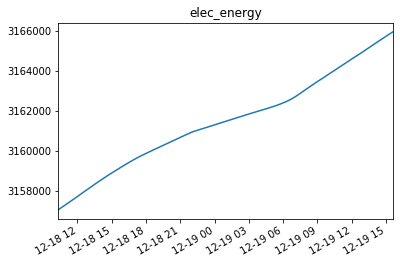

<Figure size 432x288 with 0 Axes>

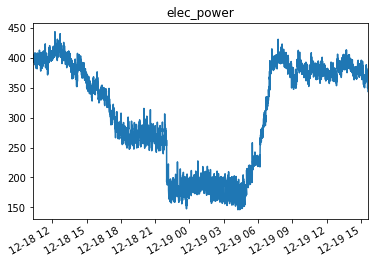

<Figure size 432x288 with 0 Axes>

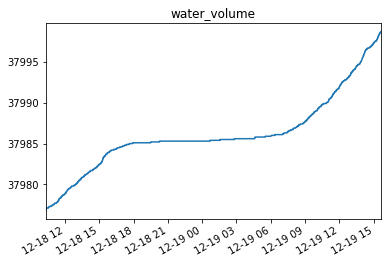

In [5]:
for col in list(df):  #a list of column names
    plt.figure()
    df.plot(y=[col], use_index=True, legend=None, title=col)
plt.show()